# Exercise sheet 3
---
**Machine Learning for Physics and Astronomy**

Semester 2, Period 5, 2021/2022

dr. Christoph Weniger, Andrea Visibile, Christiaan van Asperen, Dion Noordhuis, Kamile Lukosiute, Mathis Gerdes, Noemi Anau Montel, Silvia Cassanelli

To be handed in until **28/04/2022** - 20 points

---



## Chapter 5: Gaussian Process Regression

### 1. Gaussian Processes (11pt)

**Reading Material: Murphy 15.1 + 15.2 (up to and including 15.2.3)**

In this exercise, we will be implementing the Gaussian process regression formalism discussed in class.  

Suppose we observe a training set $(\mathbf{x}_i, f_i)$ with $i = 1, \ldots, N$ and where $f_i = f(\mathbf{x}_i)$ is a noise-free observation of the function evaluated at $\mathbf{x}_i$. Each $\mathbf{X}$ has dimensionality $D$. Below is just such a set.


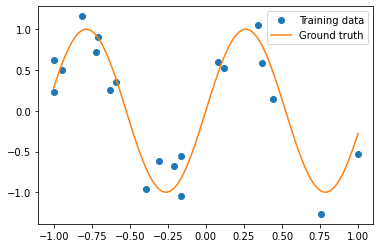

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
x_i = np.random.uniform(-1., 1., 20)
x_i[0] = -1
x_i[-1] = 1
f_i = np.sin(x_i*6) + np.random.randn(20)*0.3
x_true = np.linspace(-1, 1, 100)
f_true = np.sin(x_true*6)

plt.plot(x_i, f_i, 'o', label = 'Training data')
plt.plot(x_true, f_true, label = "Ground truth")
plt.legend()


1. (0.5pt) For the data provided above, what is $D$? What is $N$?

$D = 1$ and $N = 20$

2. (0.5pt) We need to reformat the training set as $\mathbf{X}$, a $N \times D$ matrix.   Reshape the provided $x_i$ set into an $N \times D$ numpy array. Reshape the f_i values into a variable named F, with shape $N \times 1$.

In [2]:
#N=20 and D=1
x_i = x_i.reshape([20,1])
print(x_i.shape)

f_i =  f_i.reshape([20,1])
print(f_i.shape)

(20, 1)
(20, 1)


3. (1pt) We will want to evaluate whatever  function we learn using the GP at inputs $\mathbf{X}_*$, with size $N_* \times D$ and predict outputs $\mathbf{f}_*$. In this example, let's predict 100 evenly spaced values for $\mathbf{X}_*$ from -1 to 1, so that when we plot the learned function later, it looks almost continuous. This is our *test* set. Define the variable `X_test` with these specifications, taking care to make it the right shape.

In [3]:
# N*=100 and D=1
X_test_not_reshaped = np.linspace(-1,1,100)
X_test = X_test_not_reshaped.reshape([100,1])
print(X_test.shape)

(100, 1)


4. (2pt) The full joint distribution of the training set $\mathbf{f}$ and test set $\mathbf{f_*}$ is given by

   $$
\left(\begin{array}{c}
\mathbf{f} \\
\mathbf{f}_{*}
\end{array}\right) \sim \mathcal{N}\left(\left(\begin{array}{c}
\boldsymbol{\mu} \\
\boldsymbol{\mu}_{*}
\end{array}\right),\left(\begin{array}{cc}
\boldsymbol{K} & \boldsymbol{K}_{*} \\
\boldsymbol{K}_{*}^{T} & \boldsymbol{K}_{* *}
\end{array}\right)\right)
$$
where $\mathbf{K} = \kappa (\mathbf{X}, \mathbf{X})$ is an $N \times N$ matrix, $\mathbf{K}_* = \kappa (\mathbf{X}, \mathbf{X}_*)$ is an $N \times N_*$ matrix, and $\mathbf{K}_{**} = \kappa (\mathbf{X}_*, \mathbf{X}_*)$ is an $N_* \times N_*$ matrix, based on the kernel function $\kappa( . )$. We will use the **radial basis function** (RBF) kernel, given by
$$
\kappa\left(\mathbf{x}_i, \mathbf{x}_i^{\prime}\right)= \alpha^2 \exp \left(-\frac{\left\|\mathbf{x}_i-\mathbf{x}_j\right\|^{2}}{2 l^{2}}\right)
$$

   where I've renamed the bandwidth parameter to be $l$ instead of the $\sigma$ in class because another $\sigma$ will enter the story later. The double bars indicate the Euclidean distance. We also introduced the parameter $\alpha$, and $\alpha^2$ corresponds to the variance of the GP.

   Note that the kernel function $\kappa$ recieves two points $\mathbf{x}_i$ and $\mathbf{x}_j$ and returns the function evaluated at those points. But we will need to define $\mathbf{K}$, a matrix which will have dimensions that are "total amount of $\mathbf{x}_i$'s $\times$  total amount of $\mathbf{x}_j$'s". So, just this once, I will encourage you to do something in an actual nested for-loop (just this once!) for the sake of clarity. Every other time in this course, please vectorize your functions.

   And with that long introduction finished, **implement the following functions**. `kappa(x_i, x_j, l)` should return an element-wise comparison of two individual examples $\mathbf{x}_i$ and $\mathbf{x}_j$. `Kernel(X1, X2)` should return the full matrix $\mathbf{K}$ and should be implemented with two nested for-loops.

In [43]:

def kappa(x_i, x_j, l, alpha=1.0):
    result = alpha**2 * np.exp(-(np.linalg.norm(x_i - x_j)**2)/(2 * l**2))
    return result

def Kernel(X1, X2, l, alpha=1.0):
    #x_i is x_i/x_training/X and x_j is X_test/X_star
    n1 = X1.shape[0]
    n2= X2.shape[0]

    K = []
    for i in range(n1):
      for j in range(n2):
        K.append(kappa(X1[i],X2[j], l))
    
    K = np.array(K).reshape(n1, n2)
    return K


5. (1pt) With our kernel function in hand, let's make a plot of what it looks like! Viusalize the kernel array evaluated for all values in X_test (with X_test inputed twice) using the `plt.imshow()` function for a few (~3) reasonable values of $l$. What does the $l$ parameter represent, intuitively?  [Read about plt.imshow here.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

l = 0.5


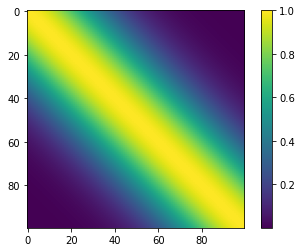

l = 1


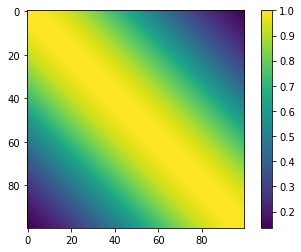

l = 2


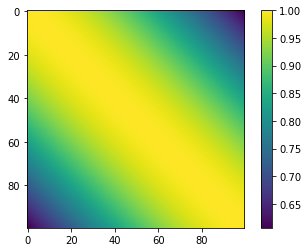

In [44]:
ls = [0.5, 1, 2]

for l in ls:
  print('l =',l)
  kernel_mat = Kernel(X_test, X_test, l)
  im = plt.imshow(kernel_mat)
  cbar = plt.colorbar(im)
  plt.show()

6. (2pt) Now it's time for Gaussian process regression!

Let's start with a recap.

**Noise-free case**. In the absence of measurement noise, the distribution of function values $\mathbf{f}_\ast$ at points $\mathbf{X}_\ast$, conditioned on training data $\mathbf{X}$ and observed function values $\mathbf{f}$, is given by $\mathbf{f}_* \sim \mathcal{N}(\mathbf{f}_*| \boldsymbol{\mu}_*,\boldsymbol{\Sigma}_*)$, where 
$$
\boldsymbol{\mu}_{*}=\boldsymbol{K}_{*}^{T} \boldsymbol{K}^{-1} \mathbf{f} \quad \text { and } \quad \boldsymbol{\Sigma}_{*}=\boldsymbol{K}_{* *}-\boldsymbol{K}_{*}^{T} \boldsymbol{K}^{-1} \boldsymbol{K}_{*}
$$
and where
$$
\mathbf{K}=\kappa(\mathbf{X}, \mathbf{X}), \mathbf{K}_{*}=\kappa\left(\mathbf{X}, \mathbf{X}_{*}\right), \text { and } K_{* *}=\kappa\left(\mathbf{X}_{*}, \mathbf{X}_{*}\right)
$$
based on the kernel function $\kappa(\cdot, \cdot)$. 

Remember that $\mathbf{f}_* \sim \mathcal{N}(\mathbf{f}_*| \boldsymbol{\mu}_*,\boldsymbol{\Sigma}_*)$ implicitely defines a posterior over **functions**, since we are free to chose $\mathbf{X}_\ast$.

**Noisy case**.  Suppose that we observe now a noisy version of the underlying function. 
   $$y = f(\mathbf{X}) + \epsilon \\ \text{where} \\ \epsilon \sim \mathcal{N}(0, \sigma_y^2)$$
The above discussion remains untouched, except that the mean and covariance are in this case given by$$
\boldsymbol{\mu}_{*}=\boldsymbol{K}_{*}^{T} \boldsymbol{K}_{y}^{-1} \mathbf{f} \quad \text { and } \quad \boldsymbol{\Sigma}_{*}=\boldsymbol{K}_{* *}-\boldsymbol{K}_{*}^{T} \boldsymbol{K}_{y}^{-1} \boldsymbol{K}_{*}
$$
where now the covariance of the training data has an additional noise term, 
$$
\mathbf{K}_{y} \equiv \mathbf{K}+\sigma_{y}^{2} \mathbf{I}_{N}
$$

**Your Task**

- Implement the function `posterior` below. `x_test` will be $\mathbf{X}_*$, `x_train` is $\mathbf{X}$ and `t_train` will be the corresponding training values $f(\mathbf{x}_i)$, `l` is the bandwidth parameter and `alpha` the (square root of the) variance of the RBF kernel.  Furthermore, `sigma_y` is the noise.
- The function should return the values (1) $\boldsymbol{\mu}_*$, (2)  $\boldsymbol{\Sigma}_*$, i.e. the parameters over the multivariate Gaussian posterior, and (3) the log marginal likelihood (see lecture slides).
   
   Hints: This function should not be long (max 10 lines), now that you have your kernel function in hand. If it is a long function, you may be doing something wrong. As a debugging tip: you can verify that you have the correct dimensions for $\mathbf{K}$, $\mathbf{K}_*$, and $\mathbf{K}_{**}$ by calling `print(K.shape)`.


In [45]:
def posterior(x_test, x_train, t_train, l=0.1, sigma_y=0.2, alpha=1.0):
  #all the Ks of the matrix
  K = Kernel(x_train, x_train, l, alpha)
  K_star = Kernel(x_train, x_test, l, alpha)
  K_double_star = Kernel(x_test, x_test, l, alpha)
  K_star_T = K_star.T

  Ky = K + sigma_y**2 * np.identity(len(x_train))
  Ky_inv = np.linalg.inv(Ky)

  mu_star = np.matmul(np.matmul(K_star_T, Ky_inv),t_train)
  sigma_star = K_double_star - np.matmul(np.matmul(K_star.T, Ky_inv), K_star)
  log_marg_like = np.matmul(np.matmul(-1/2*t_train.T, Ky_inv), t_train) - 1/2*np.log(np.linalg.det(Ky)) - 1/2*len(x_train)*np.log(2*np.pi)

  return mu_star, sigma_star, log_marg_like


7. (2pt) Run your posterior function on the training data provided earlier in this exercise, using `l=0.1`, `alpha = 0.5` and `sigma_y=0.3`, and plot the results.

- Plot 3 samples of the resulting function from the posterior on the same plot as the original training data.
- Plot the $2\sigma$ uncertainty band, all in the same one plot.
- Describe in some detail the certain vs uncertain regions of the plot. Connect back to the material discussed in class.

Notes: You can produce samples by calling `np.random.multivariate_normal`.  [You can read documentation about this function here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html). *Note the types of dimensions that this function needs for the input parameters.*

   The $2 \sigma$ uncertainty interval of the multivariate Gaussian can be calculated as `2*np.sqrt(np.diag(cov))`. Use this value to plot the uncertainty region for your posterior. The function [plt.fill_between](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) might be useful here. 


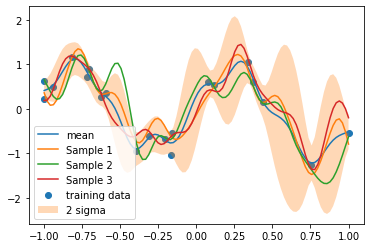

In [46]:
plt.scatter(x_i, f_i, label='training data')
mu_star = posterior(X_test, x_i, f_i)[0]
sigma_star = posterior(X_test, x_i, f_i)[1]
two_sigma = 2*np.sqrt(np.diag(sigma_star))
mu_normal = mu_star.transpose()[0]

plt.fill_between(X_test_not_reshaped, mu_normal-two_sigma, mu_normal+two_sigma, alpha=0.3, label='2 sigma')
plt.plot(X_test_not_reshaped, mu_star, label='mean')

for i in range(3):
  y = np.random.multivariate_normal(mu_normal, sigma_star)
  plt.plot(X_test_not_reshaped, y, label = "Sample %g"%(i + 1))
  
plt.legend()
plt.show()

Describe in some detail the certain vs uncertain regions of the plot. Connect back to the material discussed in class.

You can see that when there is more training data that the uncertainty decreases and when there is a region with less training data than the uncertainty increases.

8. (2pt) Via trial-and-error, grid or random scan, identify good hyper parameters `l`, `alpha` and `sigma_y`.  They should lead to a large log marginal likelihood. Plot the results of a few settings of the hyperparameters that you tried.

- What are the best-fit parameters that you find?
- What happens when `alpha` is too large or too small?
- What happens when `l` is too large or too small?

l= 0.01 sigma_y= 0.01 alpha= 0.01 log marginal likelihood= -124.61308292237399
l= 0.01 sigma_y= 0.01 alpha= 0.1 log marginal likelihood= -124.61308292237399
l= 0.01 sigma_y= 0.01 alpha= 0.5 log marginal likelihood= -124.61308292237399
l= 0.01 sigma_y= 0.01 alpha= 1 log marginal likelihood= -124.61308292237399
l= 0.01 sigma_y= 0.01 alpha= 10 log marginal likelihood= -124.61308292237399
l= 0.01 sigma_y= 0.1 alpha= 0.01 log marginal likelihood= -24.55295530026091
l= 0.01 sigma_y= 0.1 alpha= 0.1 log marginal likelihood= -24.55295530026091
l= 0.01 sigma_y= 0.1 alpha= 0.5 log marginal likelihood= -24.55295530026091
l= 0.01 sigma_y= 0.1 alpha= 1 log marginal likelihood= -24.55295530026091
l= 0.01 sigma_y= 0.1 alpha= 10 log marginal likelihood= -24.55295530026091
l= 0.01 sigma_y= 0.2 alpha= 0.01 log marginal likelihood= -22.551834187447795
l= 0.01 sigma_y= 0.2 alpha= 0.1 log marginal likelihood= -22.551834187447795
l= 0.01 sigma_y= 0.2 alpha= 0.5 log marginal likelihood= -22.551834187447795
l=

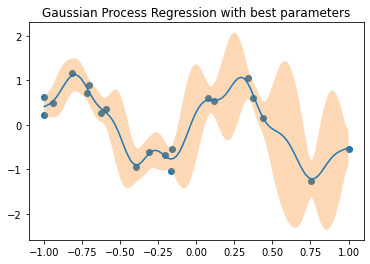

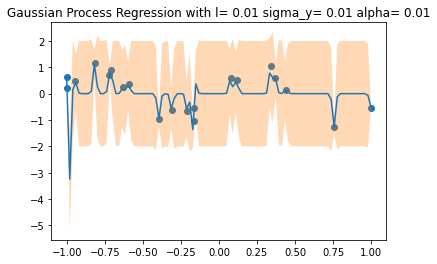

In [47]:

mu_star = posterior(X_test, x_i, f_i, l=0.1, sigma_y=0.2, alpha=1.0)[2]

l = [0.01, 0.1, 0.5, 1, 10]
sigma_y = [0.01, 0.1, 0.2, 1, 10]
alpha = [0.01, 0.1, 0.5, 1, 10]
log_marg_likelihoods = []
all_parameters = np.array([])
for i in l:
  for j in sigma_y:
    for k in alpha:
      log_marg_like = posterior(X_test, x_i, f_i, l=i, sigma_y=j, alpha=k)[2][0][0]
      log_marg_likelihoods.append(log_marg_like)
      parameters = np.array([i,j,k])
      all_parameters = np.append(all_parameters, parameters)
      print('l=',i,'sigma_y=',j, 'alpha=',k, 'log marginal likelihood=',log_marg_like)

all_parameters = all_parameters.reshape(len(log_marg_likelihoods),3)
log_marg_likelihoods = np.array(log_marg_likelihoods)
best_likeli = np.amax(log_marg_likelihoods)
arg_best_likeli = np.argmax(log_marg_likelihoods)

best_parameters = all_parameters[arg_best_likeli]
first_parameters = all_parameters[0]


print(best_parameters)
print(first_parameters)

plt.scatter(x_i, f_i, label='training data')
mu_star = posterior(X_test, x_i, f_i,l=best_parameters[0], sigma_y=best_parameters[1], alpha=best_parameters[2])[0]
sigma_star = posterior(X_test, x_i, f_i,l=best_parameters[0], sigma_y=best_parameters[1], alpha=best_parameters[2])[1]
two_sigma = 2*np.sqrt(np.diag(sigma_star))
mu_normal = mu_star.transpose()[0]

plt.fill_between(X_test_not_reshaped, mu_normal-two_sigma, mu_normal+two_sigma, alpha=0.3, label='2 sigma')
plt.plot(X_test_not_reshaped, mu_star, label='mean')
plt.title('Gaussian Process Regression with best parameters')
plt.show()

plt.scatter(x_i, f_i, label='training data')
mu_star = posterior(X_test, x_i, f_i,l=first_parameters[0], sigma_y=first_parameters[1], alpha=first_parameters[2])[0]
sigma_star = posterior(X_test, x_i, f_i,l=first_parameters[0], sigma_y=first_parameters[1], alpha=first_parameters[2])[1]
two_sigma = 2*np.sqrt(np.diag(sigma_star))
mu_normal = mu_star.transpose()[0]

plt.fill_between(X_test_not_reshaped, mu_normal-two_sigma, mu_normal+two_sigma, alpha=0.3, label='2 sigma')
plt.plot(X_test_not_reshaped, mu_star, label='mean')
plt.title('Gaussian Process Regression with l= 0.01 sigma_y= 0.01 alpha= 0.01')
plt.show()

What are the best-fit parameters that you find? l = 0.1 sigma_y = 0.2 alpha = 0.01

What happens when alpha is too large or too small? alpha does not some to influence the large log marginal likelihood too much

What happens when l is too large or too small? When l is much larger than the other parameteers than the log marginal likelihood becomes very small

## Chapter 6: Logistic regression - classification (9 points)


### 1. Logistic Regression With Numpy (7 points)

*Murphy 8.2, 8.3.2; Bishop 3.1.3, 4.3.2*

In this exercise, we will implement logistic regression to predict the gender of a person based on their height and weight. We will first do this with regular python and numpy and then introduce [PyTorch](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html), the machine learning package that will be used for the remainder of the class.

First, let's import some data.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch

In [10]:
# Import training data
# This will donwload the training data to the virtual colab data folder
# Colab deletes the stored files every time you close your browser, so make sure to run this cell every time
!wget https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv

--2022-04-28 15:56:35--  https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 418121 (408K) [text/plain]
Saving to: ‘01_heights_weights_genders.csv’

01_heights_weights_ 100%[===================>] 408.32K  --.-KB/s    in 0.004s  

2022-04-28 15:56:35 (109 MB/s) - ‘01_heights_weights_genders.csv’ saved [418121/418121]



In [11]:
# Read training data
# Now you have access to the label T (0 for Male, 1 for Female), height, and weight for 10,000 data points 
data = pd.read_csv("01_heights_weights_genders.csv")
T = np.array([0. if x=='Male' else 1. for x in data['Gender'].values])
H = data['Height'].values
W = data['Weight'].values

print(H.mean())
print(W.mean())
data

66.36755975482124
161.44035683283076


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


1. (1 points) $$\\ $$  Before we continue, we need to **scale** our data to be in similar ranges. Machine learning algorithms will not work well if the ranges of each dimension are very different. Taking a look at our data, the mean value for height is 66.36 (inches), while the mean for weight is 161 (lbs). These are incompatible and will lead to poor performance. Therefore, before we continue define new variables `H_scaled` and `W_scaled` such that they are [standardized](https://en.wikipedia.org/wiki/Feature_scaling). Also feel free to spend a few minutes reading about other feature scaling options. 

In [12]:
#H and W standarized
H_scaled = (H-H.mean())/np.std(H)
W_scaled = (W-W.mean())/np.std(W)

data['H-scaled'] = H_scaled
data['W-scaled'] = W_scaled

data = pd.get_dummies(data)
data

,Height,Weight,H-scaled,W-scaled,Gender_Female,Gender_Male
0,73.847017,241.893563,1.944061,2.505797,0,1
1,68.781904,162.310473,0.627537,0.027101,0,1
2,74.110105,212.740856,2.012443,1.597806,0,1
3,71.730978,220.042470,1.394060,1.825222,0,1
4,69.881796,206.349801,0.913421,1.398750,0,1
...,...,...,...,...,...,...
9995,66.172652,136.777454,-0.050660,-0.768151,1,0
9996,67.067155,170.867906,0.181839,0.293631,1,0
9997,63.867992,128.475319,-0.649688,-1.026730,1,0
9998,69.034243,163.852461,0.693125,0.075127,1,0


2. (0.5 points) $$\\ $$ Make a scatter plot of your data, showing the label of the data in color.


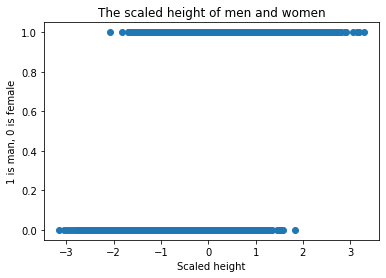

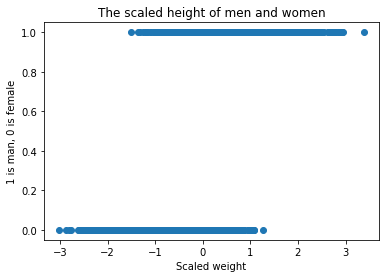

In [36]:

import seaborn as sns
#sns.scatterplot(x='H-scaled', y='W-scaled', hue='Gender_Male', data=data, alpha=0.1)
plt.scatter(data['H-scaled'], data['Gender_Male'], label='H-scaled')
plt.ylabel('1 is man, 0 is female')
plt.xlabel('Scaled height')
plt.title('The scaled height of men and women')
plt.show()

plt.scatter(data['W-scaled'], data['Gender_Male'], label='W-scaled')
plt.ylabel('1 is man, 0 is female')
plt.xlabel('Scaled weight')
plt.title('The scaled height of men and women')
plt.show()

3. (1 points) $$\\ $$ Currently, our target vector has shape (N,). However, a subtle point of numpy arrays: they can't be one-dimensional if you want to take dot products, so we need to reshape our target array into an (N,1) shape. Additionally, we need to turn our input values array from the two (N,) arrays into a singular array of shape (N,2), where 2 is the number of features we have. Perform this operation below. 

In [14]:
gender_array = np.array(data['Gender_Male']).reshape((10000,1))

W_scaled_array = np.array(data['W-scaled']).reshape((10000,1))
H_scaled_array = np.array(data['H-scaled']).reshape((10000,1))
H_W_scaled = np.concatenate((W_scaled_array, H_scaled_array), axis=1)
H_W_scaled

array([[ 2.50579697,  1.94406149],
       [ 0.02710064,  0.62753668],
       [ 1.59780623,  2.01244346],
       ...,
       [-1.02672965, -0.64968792],
       [ 0.07512745,  0.69312469],
       [-1.48850724, -1.14970831]])

4. (1. point) $$\\ $$ Now we will move onto implementing all that is needed to find an optimal solution for logistic regression using gradient descent.  Remember that our model is defined by
$$
a_n = \boldsymbol{w}^T\boldsymbol{\phi}_n \, ,
$$
$$
y_n = \sigma (a_n) \, .
$$
To start, we will need access to our loss function and our sigmoid. In addition, we will need access to our basis functions $\boldsymbol{\phi}_n$. In this case, $\boldsymbol{\phi}_n = [1, \boldsymbol{x}_n]$ so that we extend our model to include a bias. Implement these below. 

In [15]:

def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss(t, y):
    #also add small number to avoid log(0)
    loss = -(t*np.log(y+0.000001) + (1-t)*np.log(1-y+0.000001))
    loss = sum(loss)
    return loss

def phi(x):
    ones = np.ones([len(x),1])
    phi = np.concatenate((ones,x),1)
    return phi



5. (1 point) $$\\ $$ Next, we implement our gradient descent. Define a function called `gradient_descent` that takes as input the dataset transformed and in the form of basis $\boldsymbol{\phi}$, the target values, the initial values of the parameters $\boldsymbol{w}$, the number of iterations to perform, and the learning rate. It should return the loss history (the value of the loss at each iteration step) as well as the final value of $\boldsymbol{w}$. 

In [19]:

def gradient_descent(data_set_transformed, gender_array, n_iterations, learning_rate):
    w_init= np.random.uniform(size=3)
    w=w_init
    #print(w)
    
    losses = np.array([])
    for i in range(n_iterations):
        print(i)
        gradient = 0
        Y = np.array([])
        for j in range(len(data_set_transformed)):
            #print(data_set_transformed[j])
            prediction = sigmoid(np.matmul(w.T, data_set_transformed[j]))
            gradient += (prediction - gender_array[j]) * data_set_transformed[j]
            Y = np.append(Y,prediction)
        
        w = w - learning_rate * gradient
        loss_result = loss(gender_array, prediction)
        losses = np.append(losses, loss_result)

    return losses



6. (1 points) $$\\ $$ Now we have all the building blocks and are ready to train! Below we do a little bit of preprocessing and initialization. Fill in under the instructions below and train your model for 1500 iterations. Experiment a little bit with the value for the learning rate, though a value of  0.0001 is a good starting point.

In [37]:
# Transform X into phi using the function you wrote above
data_set_transformed = phi(H_W_scaled)

# In order to start gradient descent, we initialize our parameters, typically with small values

## Call your gradient_descent function here using the intiailizations from above


n_iterations=1500
learning_rate =0.0001 
losses = gradient_descent(data_set_transformed, gender_array, n_iterations, learning_rate)
print(losses)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

7. (0.5 points) $$\\ $$ Plot your loss as a function of iteration. Have the values of the weights converged yet? How can you tell?

[   0    1    2 ... 1497 1498 1499]


Text(0, 0.5, 'cross-entropy error')

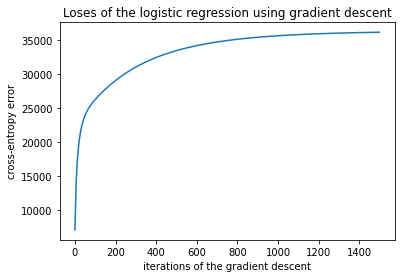

In [42]:
n_it = np.arange(len(losses))
print(n_it)
plt.plot(n_it,losses)
plt.title('Loses of the logistic regression using gradient descent')
plt.xlabel('iterations of the gradient descent')
plt.ylabel('cross-entropy error')

Plot your loss as a function of iteration. Have the values of the weights converged yet? How can you tell?

No did not convergence, since the result of the cross entropy function is only increasing, while you would expect that it would decrease. Something seems to be not correct.

8. (1 points) $$\\ $$ Make a scatter plot of your data, but now showing the output of your logistic regression model as the output.

In [ ]:
#Your code here

### 2. Logistic Regression With Pytorch (no points, but please read as it is relevant for MLPs later)

Numpy is a great framework for general scientific computing, but it cannot utilize GPUs to accelerate numerical computations nor is it ideal for machine learning specific tasks. We will therefore use Pytorch, a widely used deep learning package. In fact, logistic regression can be seen as the minimal example of a neural network: it consist of a single neuron with a sigmoid activation function. You will learn more about neural networks later in the course. \\
The most important basic concept is that a Pytorch tensor is the same as a numpy array. In this worked out example we will implement logistic regression in Pytorch in the setting of the previous exercise. You are ecouraged to run the following example and examine carefully each step as this will be an important reference to the next exercises. The following basic [tutorials](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) might be helpful to better understand Pytorch.

To train any Pytorch ML model, we need four things: a model definition, a criterion (a loss function), an optimizer (gradient descent for now; we will talk about other optimizers later), and a training routine.

First let's define the model, which we write as a class that inherits from `torch.nn.Module`. We will need one [linear](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) layer. Skim the Linear layer reference material. This time we do not need to worry about implementing basis functions, since the `torch.nn.Linear()` does this for us. The `forward` function simply computes the value of the prediction `y` given the model parameters. We will talk about why this is called "forward" later in the course.

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(2,1)

    def forward(self,x):
        y = torch.sigmoid(self.linear(x))
        return y

Defining the criterion and optimizer is a little bit easier because there are quite a few standard ones. Use the built-in torch functions to define a binary cross-entropy loss. \\
We implement batch gradient descent through torch.optim.SGD. This will implement gradient descent on the batch the model receives, since we are passing the whole dataset at once there is nothing stochastic in our case.



In [ ]:
model = LogisticRegression()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Everything in torch needs to be a tensor - *including our dataset.*

In [ ]:
X_tensor = torch.from_numpy(X).to(torch.float)
T_tensor = torch.from_numpy(T).to(torch.float)

Now let's define the training routine. A key point about Pytorch is that it has two modes: training and evaluation. In training mode, the parameters of the model are allowed to be iteratively changed. In evaluation mode, they are fixed. Whenever you are plotting or calling the model to make predictions, make sure to call `model.eval()` beforehand. Before training, call `model.train()`. 

`model.train()` is the first step in the training routine. 
Then, we define a loop that does the following things:

- Zero's the gradient. This is important because the gradient of the loss function is what is updating our model weights. We don't want this to be accidentally doing weird things and then the wrong values update our weights.
- Call the model on our X values to make predictions.
- Evaluate the predictions using the loss.
- Evaluate the gradient of the loss (this is known as the *backward* pass; we will discuss why this is called this when we get to neural networks).
- Take an optimizer step.

In [ ]:
model.train()

for epoch in range(200000):
    optimizer.zero_grad()

    # forward pass
    Y_pred = model(X_tensor)

    # compute loss
    loss = criterion(Y_pred, T_tensor)
    if epoch% 1000 == 0:
        print(loss.item())
    # backward pass
    loss.backward()
    optimizer.step()

Congratulations on training your first Pytorch model! :) Lastly, let's plot probabilistic predictions for each datapoint.

In [ ]:
model.eval()
c = [model(torch.tensor([h, w], dtype=torch.float)) for h, w in zip(H_scaled, W_scaled)]
plt.scatter(H_scaled, W_scaled, c =c)
plt.colorbar()


### 3. Star, Galaxy, or Quasar? (no points, optional)

The exercise gives no points, but we provide feedback if you try it.

*Ref: Murphy 8.3.7, Bishop 4.3.4*


![alt text](https://www.sdss.org/wp-content/uploads/2014/05/segue.jpg)


In this problem, we will be extending our Pytorch logististic regression model to predict whether an observed object is a star, galaxy, or quasar.

**The Data**

We will be using data collected by the Sloan Digital Sky Survey ([SDSS](http://www.sdss.org/)) and released as part of Data Release 14. SDSS is a multi-spectral and spectroscopic survey telescope at Apache Point Observatory in New Mexico, USA. 

The telescope uses a camera of 30 CCDs which observe in different optical filter bands (u,g,r,i,z). The data used here is freely publicly available. 

Therefore we will be importing a table of 10,000 objects, for each of which we have the following information:
- class = tells us whether the object is a GALAXY, STAR, or QSO ("quasi-stellar object" or [quasar](https://en.wikipedia.org/wiki/Quasar))
- objid = object identifiier
- specobjid = another object ID, this time for spectroscopic observations
- ra = [Right Ascension](https://en.wikipedia.org/wiki/Right_ascension)
- dec = Declination 
- mjd = date of observation


Magnitude in each of the following [filters](http://skyserver.sdss.org/dr1/en/proj/advanced/color/sdssfilters.asp):
- u
- g
- r
- i
- z

A number of attributes of the image that contained the object when imaged by SDSS:
- run = number that identifies a specific scan
- camcol = number that indicates which part of a CCD was used
- field = indicates when in the scan the object was imaged
- rerun = indicates how the image was processed
- fiberid
- plate

The last two items refer to how spectroscopic observations are taken by SDSS. The instruments use ciruclar metal plates that position optical fibers via holes drilled at the locations of objects in an image. The fibers are fed into the spectrographs. Each plate is numbered and so is each fiber. The reason we have these items in our datatable is because spectrographic observations are how SDSS determines

- [redshift](https://en.wikipedia.org/wiki/Redshift),

the last item of information we have for our objects. We will not be needing almost any of the imaging data, so you don't need to understand how SDSS works, but if you're curious, you can read about it [here](http://www.sdss3.org/dr9/imaging/imaging_basics.php). 

1. We don't need to know everything about astronomy to already understand that there are a number of data columns that won't be related to the target variable **class** in a meaningful way and may lead to only accidental correlations. Therefore we choose to drop these. Which data items do you see as appropriate to remove from the input data?

Your solution here

In [ ]:
# Let's import the aforementioned data
!wget https://raw.githubusercontent.com/klukosiute/ml4pha_datasets/main/Skyserver_SQL2_27_2018%206_51_39%20PM.csv

In [ ]:
sdss_df = pd.read_csv('/content/Skyserver_SQL2_27_2018 6_51_39 PM.csv', skiprows=0)
sdss_df.head()

2. Exploring data and understanding it is an important part of the machine learning mindset. In that spirit, find out how many objects of each class are in the catalog. How do you think this might influence how often objects are classified as a given class?

In [ ]:
#Your code here

Your answer here

3. Make histograms of redshift for stars, galaxies, and quasars. What are the results telling you? 

In [ ]:
#Your code here

Your answer here

Before we can move onto training a model that predicts objects, we need to do a few things to our dataset.

4. The first thing to do is remove the unneeded data fields from our dataset. This can be done with the [df.drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function. Do so for the fields you deemed unnecessary earlier.

In [ ]:
#Your code here

Next, we need to convert our text labels (STAR, GALAXY, or QSO) into digits. Pytorch has a particular curiosity that, for the `CrossEntropyLoss`, the inputs need to be not one-hot encoded vectors but rather simply the indices of the class. However, the output of the model **should** be a vector of length 3 because the `CrossEntropyLoss` module converts your class indices into one-hot vectors internally.

Therefore, write a function that takes as input the numpy array `sdss_df['class'].values`, which is an array of the strings STAR, GALAXY, or QSO, and converts it to an array that contains 0,1, or 2 as entries. 

5. Create your target array `T` using your function.

In [ ]:
#Your code here

6. Now build your input array `X` by feature scaling each of your feature columns and combining the features into a numpy array.

In [ ]:
#Your code here

Now the final data processing step: we will need a subset of the data to impartially evaluate the performance of our classifier. 

7. First, shuffle your X and T arrays, in such a way that each row still corresponds to each row! Split your target array `T` into two arrays: `T_train` and `T_test` and corresponding two `X_train` and `X_test` arrays, where the train test contains 90% of the datapoints and the test dataset contains 10% of the datapoints.

In [ ]:
#Your code here

8. Now we are ready to move onto the Pytorch part of the exercises. As in the exercises, convert your train and test arrays to torch tensors.

In [ ]:
#Your code here

9. Extend your code for the Logistic Regression Pytorch model from the exercises for multiclass classification with more than two input parameters. Train your code again with the  cross entropy loss, using the SGD optimizer. You can use 15000 steps and a learning rate 0.02 as a starting point.

In [ ]:
#Your code here

Although we aim to minimize the loss function, it hardly tells us as humans how well the classification scheme is performing. To get a better understanding of performance, we look at *accuracy*, or the fraction of correct predictions from total predictions. 

10. Define the function `accuracy` which takes as inputs the targets and the predictions by the model and use it to evaluate the accuracy of our logistic regression model on the train and test datasets.

In [ ]:
#Your code here

### 4. Derivation Problems (2 points)


1. (1 points) $$\\ $$ Verify that the derivative of the sigmoid
$$
\sigma(a) = \frac{1}{1 + \exp(-a)} \, ,
$$
is
$$
\frac{d\sigma}{da} = \sigma(1 - \sigma) \, .
$$

$$
\sigma(a) = \frac{1}{1 + e^{-a}} \
$$
$$
\frac{d}{da}\sigma(a) = \frac{d}{da}\frac{1}{1 + e^{-a}} \
$$
$$
=- (1 + e^{-a})^{-2}(-e^{-a})
$$
$$
=\frac{e^{-a}}{(1+e^{-a})^2}
$$
$$
=\frac{1}{1 + e^{-a}}\frac{e^{-a}}{1 + e^{-a}}
$$
$$
=\frac{1}{1 + e^{-a}}\frac{e^{-a} + (1 - 1)}{1 + e^{-a}}
$$
$$
=\frac{1}{1 + e^{-a}} (\frac{1 + e^{-a}}{1 + e^{-a}} - \frac{1}{1 + e^{-a}})
$$
$$
=\frac{1}{1 + e^{-a}} (1 - \frac{1}{1 + e^{-a}})
$$

$$
\frac{d\sigma}{da} = \sigma(1 - \sigma) \ 
$$

2. (1 points) $$\\ $$ Starting with the likelihood of the binary logistic regression
$$
p(\mathbf{t} | \mathbf{w})=\prod_{n=1}^{N} y_{n}^{t_{n}}\left\{1-y_{n}\right\}^{1-t_{n}} \, ,
$$
show that the negative logarithm of the likelihood gives the *binary cross-entropy* error and that the derivative of the cross entropy error is
$$
\nabla E(\mathbf{w})=\sum_{n=1}^{N}\left(y_{n}-t_{n}\right) \phi_{n} \, .
$$


$$
p(\mathbf{t} | \mathbf{w})=\prod_{n=1}^{N} y_{n}^{t_{n}}\left\{1-y_{n}\right\}^{1-t_{n}} \, ,
$$



